In [60]:
import pandas as pd
import numpy as np
import json
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel("House_Rent_Train.xlsx")

In [4]:
df

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,ff8081815733a243015733b2876600a6,BHK2,NaN,21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,...,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,...,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,...,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,...,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,...,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20550,19,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20551,20,BHK2,NaN,NaN,NaN,NaN,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20552,21,BHK2,NaN,NaN,NaN,NaN,NaN,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20553,22,BHK2,NaN,NaN,NaN,NaN,NaN,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['id', 'type', 'locality', 'activation_date', 'latitude', 'longitude',
       'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'furnishing', 'parking', 'property_size', 'property_age', 'bathroom',
       'facing', 'cup_board', 'floor', 'total_floor', 'amenities',
       'water_supply', 'building_type', 'balconies', 'rent'],
      dtype='object')

In [7]:
df.nunique()

id                 20523
type                   9
locality            1917
activation_date    19566
latitude           17733
longitude          17726
lease_type             4
gym                    2
lift                   2
swimming_pool          2
negotiable             2
furnishing             3
parking                4
property_size       1141
property_age          44
bathroom               8
facing                 8
cup_board             19
floor                 23
total_floor           27
amenities           4994
water_supply           3
building_type          4
balconies              9
rent                 206
dtype: int64

In [8]:
df.drop(columns='id', inplace=True)

In [9]:
df

,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,BHK2,NaN,21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,0,...,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,BHK2,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,1,...,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,BHK3,Thiruvanmiyur,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,0,...,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,1,...,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,1,...,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20550,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20551,BHK2,NaN,NaN,NaN,NaN,NaN,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20552,BHK2,NaN,NaN,NaN,NaN,NaN,1,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20553,BHK2,NaN,NaN,NaN,NaN,NaN,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.isnull().sum()

type                27
locality           160
activation_date     23
latitude            23
longitude           23
lease_type          23
gym                  0
lift                 0
swimming_pool        0
negotiable           0
furnishing           0
parking              0
property_size        0
property_age        23
bathroom            23
facing              23
cup_board           23
floor               23
total_floor         23
amenities           23
water_supply        23
building_type       23
balconies           23
rent                23
dtype: int64

In [11]:
df = df.dropna().reset_index(drop=True)

In [13]:
df.isnull().sum()

type               0
locality           0
activation_date    0
latitude           0
longitude          0
lease_type         0
gym                0
lift               0
swimming_pool      0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age       0
bathroom           0
facing             0
cup_board          0
floor              0
total_floor        0
amenities          0
water_supply       0
building_type      0
balconies          0
rent               0
dtype: int64

In [12]:
df

,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,BHK2,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,1,...,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
1,BHK3,Thiruvanmiyur,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,0,...,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
2,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,1,...,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
3,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,1,...,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0
4,BHK1,"Seetharampalya,Hoodi",24-10-2017 18:29,12.986196,77.718314,FAMILY,1,1,1,1,...,2.0,E,1.0,3.0,5.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":false,""AC"":...",CORP_BORE,AP,2.0,18000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20372,BHK1,Ulsoor,2017-11-10 17:08:00,12.979762,77.615395,ANYONE,0,1,0,1,...,2.0,E,1.0,1.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",CORP_BORE,AP,1.0,20000.0
20373,BHK2,Koramangala 4th Block,19-10-2017 20:31,12.931072,77.632361,ANYONE,0,0,0,1,...,2.0,N,2.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IH,2.0,30000.0
20374,BHK2,Kumaraswamy Layout,21-12-2017 21:18,12.901800,77.566597,FAMILY,1,1,0,1,...,2.0,W,2.0,5.0,5.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",BOREWELL,AP,2.0,16000.0
20375,BHK2,Indiranagar,28-06-2018 21:58,12.965502,77.647694,FAMILY,0,1,0,0,...,2.0,E,2.0,2.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",CORP_BORE,AP,3.0,30000.0


In [14]:
df.loc[0,'amenities']

'{"LIFT":true,"GYM":false,"INTERNET":false,"AC":false,"CLUB":false,"INTERCOM":false,"POOL":false,"CPA":false,"FS":false,"SERVANT":false,"SECURITY":true,"SC":true,"GP":false,"PARK":true,"RWH":true,"STP":true,"HK":false,"PB":true,"VP":true}'

In [15]:
df.loc[1,'amenities']

'{"LIFT":true,"GYM":false,"INTERNET":false,"AC":false,"CLUB":false,"INTERCOM":false,"POOL":false,"CPA":true,"FS":false,"SERVANT":false,"SECURITY":false,"SC":true,"GP":false,"PARK":true,"RWH":false,"STP":false,"HK":false,"PB":true,"VP":true}'

In [21]:
def amenities_encoding(amenities): 
    # load the string dictionary to json [convert true=True and false=False - boolean format] 
    a = json.loads(amenities) 
    # value = True means convert to 1, else convert to 0 ----> [so True convert to 1 and False convert to 0] 
    b = {key:1 if value else 0 for key,value in a.items()} 
    # remove the existing column in df 
    for i in ['LIFT','GYM','POOL']:
        b.pop(i, None) 
    return b

In [24]:
df['amenities'] = df['amenities'].apply(lambda x: amenities_encoding(x))

In [25]:
df

,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,BHK2,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,1,...,2.0,NE,2.0,3.0,4.0,"{'INTERNET': 0, 'AC': 0, 'CLUB': 0, 'INTERCOM'...",CORPORATION,AP,2.0,22000.0
1,BHK3,Thiruvanmiyur,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,0,...,3.0,E,3.0,1.0,5.0,"{'INTERNET': 0, 'AC': 0, 'CLUB': 0, 'INTERCOM'...",CORP_BORE,AP,3.0,28000.0
2,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,1,...,1.0,E,1.0,1.0,2.0,"{'INTERNET': 0, 'AC': 0, 'CLUB': 0, 'INTERCOM'...",CORPORATION,IH,0.0,8000.0
3,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,1,...,3.0,E,4.0,0.0,0.0,"{'INTERNET': 0, 'AC': 0, 'CLUB': 0, 'INTERCOM'...",CORPORATION,IH,1.0,45000.0
4,BHK1,"Seetharampalya,Hoodi",24-10-2017 18:29,12.986196,77.718314,FAMILY,1,1,1,1,...,2.0,E,1.0,3.0,5.0,"{'INTERNET': 0, 'AC': 0, 'CLUB': 1, 'INTERCOM'...",CORP_BORE,AP,2.0,18000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20372,BHK1,Ulsoor,2017-11-10 17:08:00,12.979762,77.615395,ANYONE,0,1,0,1,...,2.0,E,1.0,1.0,4.0,"{'INTERNET': 1, 'AC': 0, 'CLUB': 0, 'INTERCOM'...",CORP_BORE,AP,1.0,20000.0
20373,BHK2,Koramangala 4th Block,19-10-2017 20:31,12.931072,77.632361,ANYONE,0,0,0,1,...,2.0,N,2.0,1.0,2.0,"{'INTERNET': 1, 'AC': 0, 'CLUB': 0, 'INTERCOM'...",CORPORATION,IH,2.0,30000.0
20374,BHK2,Kumaraswamy Layout,21-12-2017 21:18,12.901800,77.566597,FAMILY,1,1,0,1,...,2.0,W,2.0,5.0,5.0,"{'INTERNET': 1, 'AC': 0, 'CLUB': 1, 'INTERCOM'...",BOREWELL,AP,2.0,16000.0
20375,BHK2,Indiranagar,28-06-2018 21:58,12.965502,77.647694,FAMILY,0,1,0,0,...,2.0,E,2.0,2.0,4.0,"{'INTERNET': 1, 'AC': 0, 'CLUB': 0, 'INTERCOM'...",CORP_BORE,AP,3.0,30000.0


In [28]:
# make new dataframe for amenities dictionary 
amenities_df = pd.DataFrame(df['amenities'].tolist(), index=df.index) 
# column names convert to lower case 
amenities_df.columns = amenities_df.columns.str.lower() 
amenities_df.tail()

,internet,ac,club,intercom,cpa,fs,servant,security,sc,gp,park,rwh,stp,hk,pb,vp
20372,1,0,0.0,0,0.0,1,0.0,1,1,1.0,1,0.0,0.0,1,0,1.0
20373,1,0,0.0,0,0.0,0,0.0,0,1,0.0,1,1.0,0.0,0,0,0.0
20374,1,0,1.0,0,1.0,0,0.0,1,0,0.0,1,0.0,0.0,0,1,0.0
20375,1,0,0.0,0,1.0,1,0.0,1,1,0.0,1,0.0,0.0,1,1,1.0
20376,0,0,0.0,0,0.0,0,0.0,0,1,0.0,1,0.0,0.0,0,0,0.0


In [29]:
# concatinate amenities dataframe with df 
df = pd.concat([df, amenities_df], axis=1) 
df.drop(columns='amenities', inplace=True)

In [30]:
df.tail()

,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,...,servant,security,sc,gp,park,rwh,stp,hk,pb,vp
20372,BHK1,Ulsoor,2017-11-10 17:08:00,12.979762,77.615395,ANYONE,0,1,0,1,...,0.0,1,1,1.0,1,0.0,0.0,1,0,1.0
20373,BHK2,Koramangala 4th Block,19-10-2017 20:31,12.931072,77.632361,ANYONE,0,0,0,1,...,0.0,0,1,0.0,1,1.0,0.0,0,0,0.0
20374,BHK2,Kumaraswamy Layout,21-12-2017 21:18,12.901800,77.566597,FAMILY,1,1,0,1,...,0.0,1,0,0.0,1,0.0,0.0,0,1,0.0
20375,BHK2,Indiranagar,28-06-2018 21:58,12.965502,77.647694,FAMILY,0,1,0,0,...,0.0,1,1,0.0,1,0.0,0.0,1,1,1.0
20376,BHK1,Malleshwaram West,2018-08-07 22:31:00,12.998645,77.574336,ANYONE,0,0,0,1,...,0.0,0,1,0.0,1,0.0,0.0,0,0,0.0


In [31]:
df.isnull().sum()

type                  0
locality              0
activation_date       0
latitude              0
longitude             0
lease_type            0
gym                   0
lift                  0
swimming_pool         0
negotiable            0
furnishing            0
parking               0
property_size         0
property_age          0
bathroom              0
facing                0
cup_board             0
floor                 0
total_floor           0
water_supply          0
building_type         0
balconies             0
rent                  0
internet              0
ac                    0
club               1055
intercom              0
cpa                1055
fs                    0
servant            1055
security              0
sc                    0
gp                 1055
park                  0
rwh                1055
stp                1055
hk                    0
pb                    0
vp                 1055
dtype: int64

In [32]:
df.fillna(0, inplace=True)

In [33]:
df.isnull().sum()

type               0
locality           0
activation_date    0
latitude           0
longitude          0
lease_type         0
gym                0
lift               0
swimming_pool      0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age       0
bathroom           0
facing             0
cup_board          0
floor              0
total_floor        0
water_supply       0
building_type      0
balconies          0
rent               0
internet           0
ac                 0
club               0
intercom           0
cpa                0
fs                 0
servant            0
security           0
sc                 0
gp                 0
park               0
rwh                0
stp                0
hk                 0
pb                 0
vp                 0
dtype: int64

In [34]:
df1 = df

In [35]:
df1.nunique()

type                   9
locality            1917
activation_date    19429
latitude           17625
longitude          17617
lease_type             4
gym                    2
lift                   2
swimming_pool          2
negotiable             2
furnishing             3
parking                4
property_size       1136
property_age          44
bathroom               8
facing                 8
cup_board             19
floor                 23
total_floor           27
water_supply           3
building_type          4
balconies              9
rent                 206
internet               2
ac                     2
club                   2
intercom               2
cpa                    2
fs                     2
servant                2
security               2
sc                     2
gp                     2
park                   2
rwh                    2
stp                    2
hk                     2
pb                     2
vp                     2
dtype: int64

In [36]:
df1.tail(3)

,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,...,servant,security,sc,gp,park,rwh,stp,hk,pb,vp
20374,BHK2,Kumaraswamy Layout,21-12-2017 21:18,12.901800,77.566597,FAMILY,1,1,0,1,...,0.0,1,0,0.0,1,0.0,0.0,0,1,0.0
20375,BHK2,Indiranagar,28-06-2018 21:58,12.965502,77.647694,FAMILY,0,1,0,0,...,0.0,1,1,0.0,1,0.0,0.0,1,1,1.0
20376,BHK1,Malleshwaram West,2018-08-07 22:31:00,12.998645,77.574336,ANYONE,0,0,0,1,...,0.0,0,1,0.0,1,0.0,0.0,0,0,0.0


In [37]:
df1['activation_date'] = pd.to_datetime(df1['activation_date']) 

In [38]:
df1['activation_day'] = df1['activation_date'].dt.day 
df1['activation_month'] = df1['activation_date'].dt.month 
df1['activation_year'] = df1['activation_date'].dt.year 
df1.drop(columns='activation_date', inplace=True)

In [39]:
# calculate the count of amenities
df1['no_of_amenities'] = df1['gym'] + df1['lift'] + df1['swimming_pool'] + df1['internet'] + df1['ac'] + df1['club'] + df1['intercom'] + df1['cpa'] + df1['fs'] + df1['servant'] + df1['security'] + df1['sc'] + df1['gp'] + df1['park'] + df1['rwh'] + df1['stp'] + df1['hk'] + df1['pb'] + df1['vp']

In [40]:
df1.head()

,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,...,park,rwh,stp,hk,pb,vp,activation_day,activation_month,activation_year,no_of_amenities
0,BHK2,Bellandur,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,...,1,1.0,1.0,0,1,1.0,10,9,2017,8.0
1,BHK3,Thiruvanmiyur,12.982870,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,...,1,0.0,0.0,0,1,1.0,6,12,2018,6.0
2,BHK1,Attiguppe,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,...,0,0.0,0.0,0,0,0.0,20,7,2018,0.0
3,BHK3,Kodihalli,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,...,1,0.0,0.0,0,0,1.0,31,5,2018,3.0
4,BHK1,"Seetharampalya,Hoodi",12.986196,77.718314,FAMILY,1,1,1,1,SEMI_FURNISHED,...,0,0.0,0.0,0,1,0.0,24,10,2017,8.0


In [41]:
df1.describe()

,latitude,longitude,gym,lift,swimming_pool,negotiable,property_size,property_age,bathroom,cup_board,...,park,rwh,stp,hk,pb,vp,activation_day,activation_month,activation_year,no_of_amenities
count,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,...,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000
mean,12.945750,77.637238,0.226235,0.361142,0.174461,0.711488,1061.437209,5.777053,1.857732,4.567503,...,0.506012,0.246503,0.170535,0.198557,0.364921,0.238553,15.344555,6.325072,2017.637336,5.177700
std,0.029587,0.110758,0.418404,0.480344,0.379515,0.453081,591.857798,6.362450,0.710933,336.427053,...,0.499976,0.430986,0.376112,0.398924,0.481420,0.426209,8.864386,3.251640,0.480781,4.570412
min,12.900004,77.500072,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2017.000000,0.000000
25%,12.918232,77.571912,0.000000,0.000000,0.000000,0.000000,700.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,2017.000000,2.000000
50%,12.943792,77.633367,0.000000,0.000000,0.000000,1.000000,1044.000000,5.000000,2.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,6.000000,2018.000000,3.000000
75%,12.970922,77.695692,0.000000,1.000000,0.000000,1.000000,1280.000000,10.000000,2.000000,3.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,23.000000,9.000000,2018.000000,8.000000
max,12.999999,80.266346,1.000000,1.000000,1.000000,1.000000,50000.000000,400.000000,21.000000,48026.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,12.000000,2018.000000,19.000000


In [42]:
# remove the negative value in property_age column

df1 = df1[df1['property_age']>=0].reset_index(drop=True) 

In [43]:
df1.describe()

,latitude,longitude,gym,lift,swimming_pool,negotiable,property_size,property_age,bathroom,cup_board,...,park,rwh,stp,hk,pb,vp,activation_day,activation_month,activation_year,no_of_amenities
count,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,...,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000
mean,12.945743,77.637263,0.226406,0.361040,0.174548,0.711266,1061.762338,5.788046,1.858140,4.572061,...,0.505948,0.246412,0.170615,0.198781,0.365022,0.238547,15.342017,6.325796,2017.636748,5.178431
std,0.029582,0.110805,0.418515,0.480314,0.379589,0.453185,592.100777,6.361746,0.711027,336.699793,...,0.499977,0.430932,0.376182,0.399093,0.481448,0.426206,8.862771,3.253369,0.480948,4.571908
min,12.900004,77.500072,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2017.000000,0.000000
25%,12.918239,77.571956,0.000000,0.000000,0.000000,0.000000,700.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,2017.000000,2.000000
50%,12.943787,77.633368,0.000000,0.000000,0.000000,1.000000,1045.000000,5.000000,2.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,6.000000,2018.000000,3.000000
75%,12.970899,77.695702,0.000000,1.000000,0.000000,1.000000,1280.000000,10.000000,2.000000,3.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,23.000000,9.000000,2018.000000,8.000000
max,12.999999,80.266346,1.000000,1.000000,1.000000,1.000000,50000.000000,400.000000,21.000000,48026.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,12.000000,2018.000000,19.000000


In [44]:
# rearrange the columns order 

df1 = df1[['activation_day', 'activation_month', 'activation_year', 'locality', 'latitude', 'longitude', 'type', 'lease_type', 'property_size', 'property_age', 'furnishing', 'facing', 'floor', 'total_floor', 'building_type', 'water_supply', 'negotiable', 'cup_board', 'balconies', 'parking', 'bathroom', 'gym', 'lift', 'swimming_pool', 'internet', 'ac', 'club', 'intercom', 'cpa', 'fs', 'servant', 'security', 'sc', 'gp', 'park', 'rwh', 'stp', 'hk', 'pb', 'vp', 'no_of_amenities', 'rent']]

In [45]:
df1.head()

,activation_day,activation_month,activation_year,locality,latitude,longitude,type,lease_type,property_size,property_age,...,sc,gp,park,rwh,stp,hk,pb,vp,no_of_amenities,rent
0,10,9,2017,Bellandur,12.929557,77.672280,BHK2,ANYONE,1400,4.0,...,1,0.0,1,1.0,1.0,0,1,1.0,8.0,22000.0
1,6,12,2018,Thiruvanmiyur,12.982870,80.262012,BHK3,FAMILY,1350,6.0,...,1,0.0,1,0.0,0.0,0,1,1.0,6.0,28000.0
2,20,7,2018,Attiguppe,12.955991,77.531634,BHK1,FAMILY,600,3.0,...,0,0.0,0,0.0,0.0,0,0,0.0,0.0,8000.0
3,31,5,2018,Kodihalli,12.963903,77.649446,BHK3,FAMILY,1500,15.0,...,0,0.0,1,0.0,0.0,0,0,1.0,3.0,45000.0
4,24,10,2017,"Seetharampalya,Hoodi",12.986196,77.718314,BHK1,FAMILY,1080,0.0,...,0,0.0,0,0.0,0.0,0,1,0.0,8.0,18000.0


In [46]:
df1['type'].unique()

array(['BHK2', 'BHK3', 'BHK1', 'RK1', 'BHK4', 'BHK4PLUS', '1BHK1', 'bhk2',
       'bhk3'], dtype=object)

In [47]:
# Handle the duplicate

type_dict = {'1BHK1':'BHK1', 'bhk2':'BHK2', 'bhk3':'BHK3'} 
df1['type'] = df1['type'].apply(lambda x: type_dict[x] if x in ['1BHK1', 'bhk2', 'bhk3'] else x)

In [48]:
df1.head()

,activation_day,activation_month,activation_year,locality,latitude,longitude,type,lease_type,property_size,property_age,...,sc,gp,park,rwh,stp,hk,pb,vp,no_of_amenities,rent
0,10,9,2017,Bellandur,12.929557,77.672280,BHK2,ANYONE,1400,4.0,...,1,0.0,1,1.0,1.0,0,1,1.0,8.0,22000.0
1,6,12,2018,Thiruvanmiyur,12.982870,80.262012,BHK3,FAMILY,1350,6.0,...,1,0.0,1,0.0,0.0,0,1,1.0,6.0,28000.0
2,20,7,2018,Attiguppe,12.955991,77.531634,BHK1,FAMILY,600,3.0,...,0,0.0,0,0.0,0.0,0,0,0.0,0.0,8000.0
3,31,5,2018,Kodihalli,12.963903,77.649446,BHK3,FAMILY,1500,15.0,...,0,0.0,1,0.0,0.0,0,0,1.0,3.0,45000.0
4,24,10,2017,"Seetharampalya,Hoodi",12.986196,77.718314,BHK1,FAMILY,1080,0.0,...,0,0.0,0,0.0,0.0,0,1,0.0,8.0,18000.0


In [49]:
df1['type'].unique()

array(['BHK2', 'BHK3', 'BHK1', 'RK1', 'BHK4', 'BHK4PLUS'], dtype=object)

In [50]:
df1['facing'].unique()

array(['NE', 'E', 'S', 'N', 'SE', 'W', 'NW', 'SW'], dtype=object)

In [51]:
df1.to_csv('df_sample.csv', index=False)

# EDA

In [52]:
# encoding the categorical features into numerical features

df1['type'] = df1['type'].map({'RK1':0, 'BHK1':1, 'BHK2':2, 'BHK3':3, 'BHK4':4, 'BHK4PLUS':5})
df1['facing'] = df1['facing'].map({'N':1, 'E':2, 'W':3, 'S':4, 'NE':5, 'NW':6, 'SE':7, 'SW':8})
df1['lease_type'] = df1['lease_type'].map({'BACHELOR':1, 'FAMILY':2, 'COMPANY':3, 'ANYONE':4})
df1['furnishing'] = df1['furnishing'].map({'NOT_FURNISHED':0, 'SEMI_FURNISHED':1, 'FULLY_FURNISHED':2})
df1['parking'] = df1['parking'].map({'NONE':0, 'TWO_WHEELER':1, 'FOUR_WHEELER':2, 'BOTH':3})
df1['water_supply'] = df1['water_supply'].map({'CORPORATION':1, 'CORP_BORE':2, 'BOREWELL':3,}) 
df1['building_type'] = df1['building_type'].map({'AP':1, 'IH':2, 'IF':3, 'GC':4})

In [53]:
df1.head()

,activation_day,activation_month,activation_year,locality,latitude,longitude,type,lease_type,property_size,property_age,...,sc,gp,park,rwh,stp,hk,pb,vp,no_of_amenities,rent
0,10,9,2017,Bellandur,12.929557,77.672280,2,4,1400,4.0,...,1,0.0,1,1.0,1.0,0,1,1.0,8.0,22000.0
1,6,12,2018,Thiruvanmiyur,12.982870,80.262012,3,2,1350,6.0,...,1,0.0,1,0.0,0.0,0,1,1.0,6.0,28000.0
2,20,7,2018,Attiguppe,12.955991,77.531634,1,2,600,3.0,...,0,0.0,0,0.0,0.0,0,0,0.0,0.0,8000.0
3,31,5,2018,Kodihalli,12.963903,77.649446,3,2,1500,15.0,...,0,0.0,1,0.0,0.0,0,0,1.0,3.0,45000.0
4,24,10,2017,"Seetharampalya,Hoodi",12.986196,77.718314,1,2,1080,0.0,...,0,0.0,0,0.0,0.0,0,1,0.0,8.0,18000.0


In [54]:
# Descriptive statistics
df1.describe()

,activation_day,activation_month,activation_year,latitude,longitude,type,lease_type,property_size,property_age,furnishing,...,sc,gp,park,rwh,stp,hk,pb,vp,no_of_amenities,rent
count,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,...,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000
mean,15.342017,6.325796,2017.636748,12.945743,77.637263,2.011994,2.918748,1061.762338,5.788046,0.987318,...,0.471687,0.099784,0.505948,0.246412,0.170615,0.198781,0.365022,0.238547,5.178431,19048.188409
std,8.862771,3.253369,0.480948,0.029582,0.110805,0.746193,1.037580,592.100777,6.361746,0.356451,...,0.499210,0.299719,0.499977,0.430932,0.376182,0.399093,0.481448,0.426206,4.571908,8431.271930
min,1.000000,1.000000,2017.000000,12.900004,77.500072,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8000.000000
25%,7.000000,4.000000,2017.000000,12.918239,77.571956,2.000000,2.000000,700.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12500.000000
50%,15.000000,6.000000,2018.000000,12.943787,77.633368,2.000000,2.000000,1045.000000,5.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,17500.000000
75%,23.000000,9.000000,2018.000000,12.970899,77.695702,2.000000,4.000000,1280.000000,10.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,8.000000,24000.000000
max,31.000000,12.000000,2018.000000,12.999999,80.266346,5.000000,4.000000,50000.000000,400.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,50000.000000


In [55]:
df1.nunique()

activation_day         31
activation_month       12
activation_year         2
locality             1915
latitude            17594
longitude           17587
type                    6
lease_type              4
property_size        1136
property_age           43
furnishing              3
facing                  8
floor                  23
total_floor            27
building_type           4
water_supply            3
negotiable              2
cup_board              19
balconies               9
parking                 4
bathroom                8
gym                     2
lift                    2
swimming_pool           2
internet                2
ac                      2
club                    2
intercom                2
cpa                     2
fs                      2
servant                 2
security                2
sc                      2
gp                      2
park                    2
rwh                     2
stp                     2
hk                      2
pb          

In [56]:
df1.dtypes

activation_day        int32
activation_month      int32
activation_year       int32
locality             object
latitude            float64
longitude           float64
type                  int64
lease_type            int64
property_size         int64
property_age        float64
furnishing            int64
facing                int64
floor               float64
total_floor         float64
building_type         int64
water_supply          int64
negotiable            int64
cup_board           float64
balconies           float64
parking               int64
bathroom            float64
gym                   int64
lift                  int64
swimming_pool         int64
internet              int64
ac                    int64
club                float64
intercom              int64
cpa                 float64
fs                    int64
servant             float64
security              int64
sc                    int64
gp                  float64
park                  int64
rwh                 

In [57]:
df1.isnull().sum()

activation_day      0
activation_month    0
activation_year     0
locality            0
latitude            0
longitude           0
type                0
lease_type          0
property_size       0
property_age        0
furnishing          0
facing              0
floor               0
total_floor         0
building_type       0
water_supply        0
negotiable          0
cup_board           0
balconies           0
parking             0
bathroom            0
gym                 0
lift                0
swimming_pool       0
internet            0
ac                  0
club                0
intercom            0
cpa                 0
fs                  0
servant             0
security            0
sc                  0
gp                  0
park                0
rwh                 0
stp                 0
hk                  0
pb                  0
vp                  0
no_of_amenities     0
rent                0
dtype: int64

In [58]:
df1.columns

Index(['activation_day', 'activation_month', 'activation_year', 'locality',
       'latitude', 'longitude', 'type', 'lease_type', 'property_size',
       'property_age', 'furnishing', 'facing', 'floor', 'total_floor',
       'building_type', 'water_supply', 'negotiable', 'cup_board', 'balconies',
       'parking', 'bathroom', 'gym', 'lift', 'swimming_pool', 'internet', 'ac',
       'club', 'intercom', 'cpa', 'fs', 'servant', 'security', 'sc', 'gp',
       'park', 'rwh', 'stp', 'hk', 'pb', 'vp', 'no_of_amenities', 'rent'],
      dtype='object')

In [89]:
# Display basic information about the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20344 entries, 0 to 20343
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   activation_day    20344 non-null  int64  
 1   activation_month  20344 non-null  int64  
 2   activation_year   20344 non-null  int64  
 3   locality          20344 non-null  object 
 4   latitude          20344 non-null  float64
 5   longitude         20344 non-null  float64
 6   type              20344 non-null  int64  
 7   lease_type        20344 non-null  int64  
 8   property_size     20344 non-null  int64  
 9   property_age      20344 non-null  float64
 10  furnishing        20344 non-null  int64  
 11  facing            20344 non-null  int64  
 12  floor             20344 non-null  float64
 13  total_floor       20344 non-null  float64
 14  building_type     20344 non-null  int64  
 15  water_supply      20344 non-null  int64  
 16  negotiable        20344 non-null  int64 

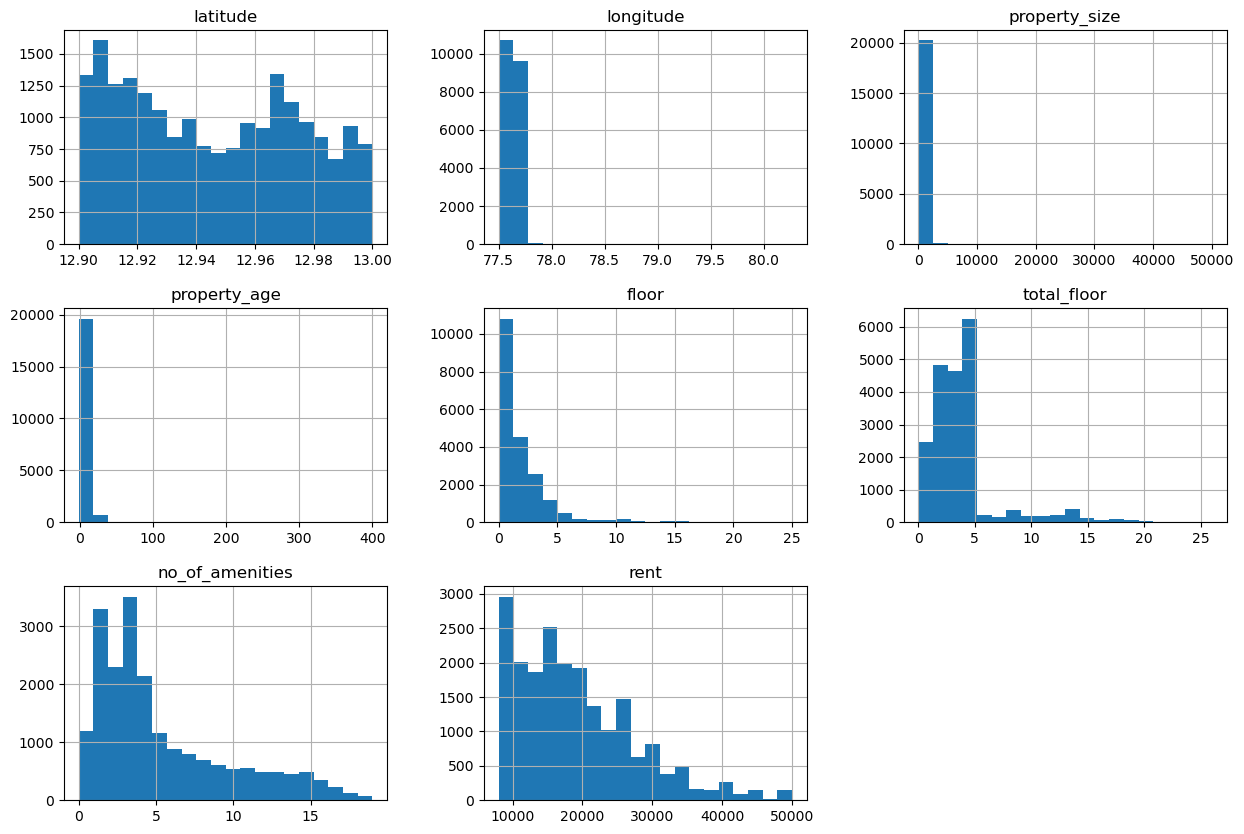

In [90]:
# Distribution of numeric features
numeric_features = ['latitude', 'longitude', 'property_size', 'property_age', 'floor', 'total_floor', 'no_of_amenities', 'rent']
df[numeric_features].hist(bins=20, figsize=(15, 10))
plt.show()

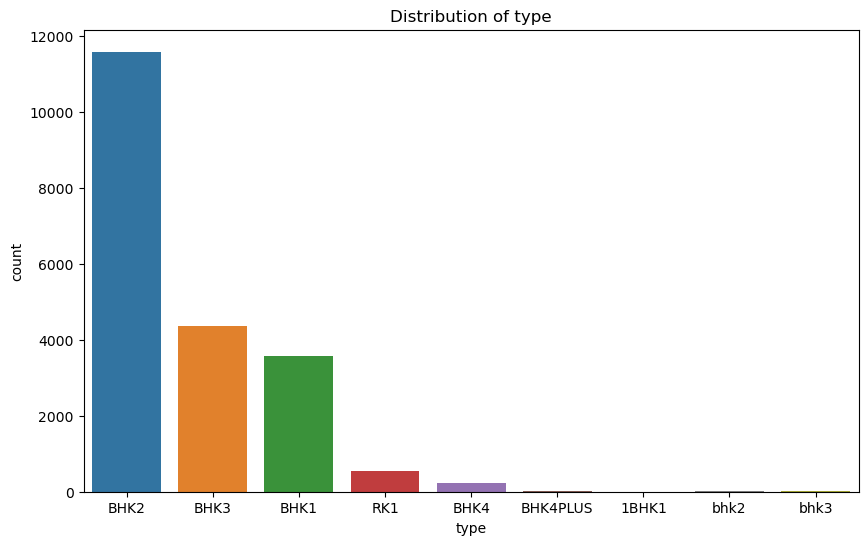

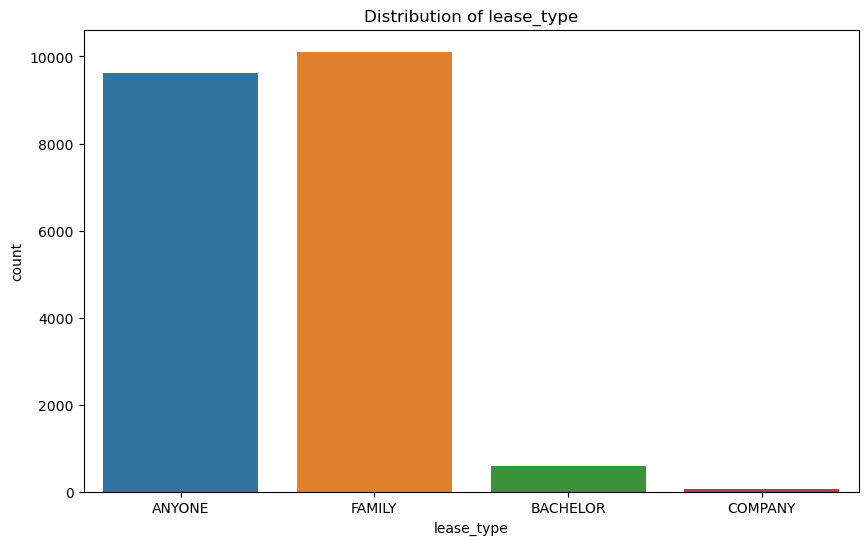

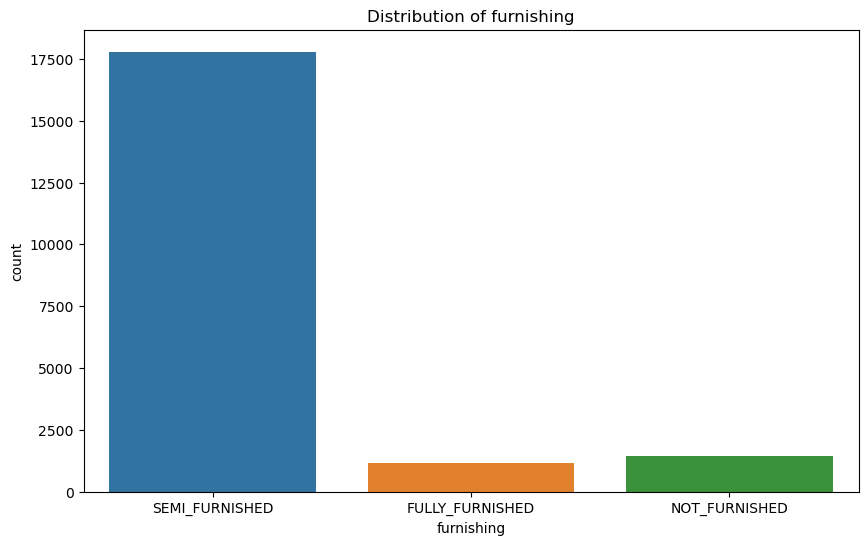

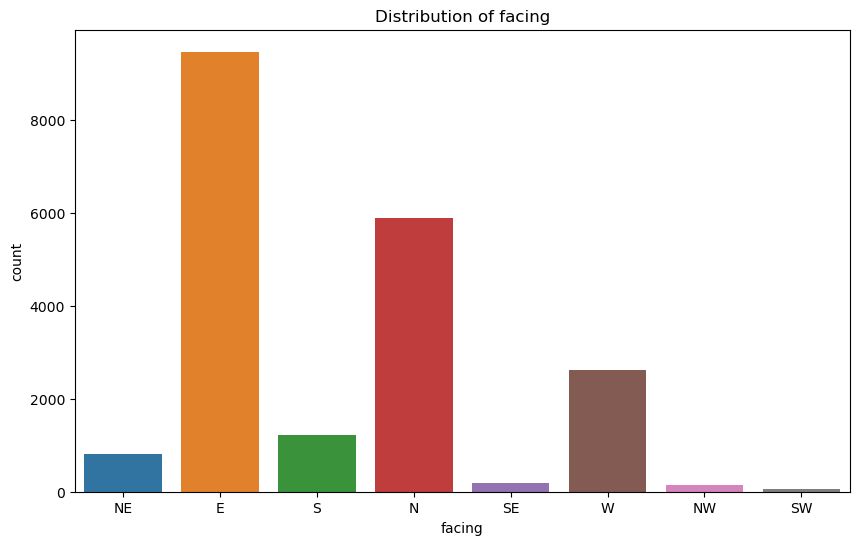

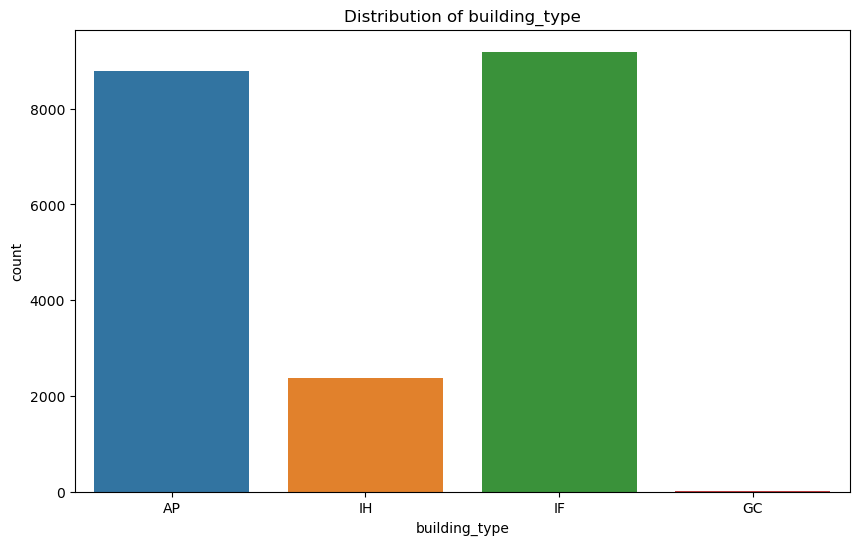

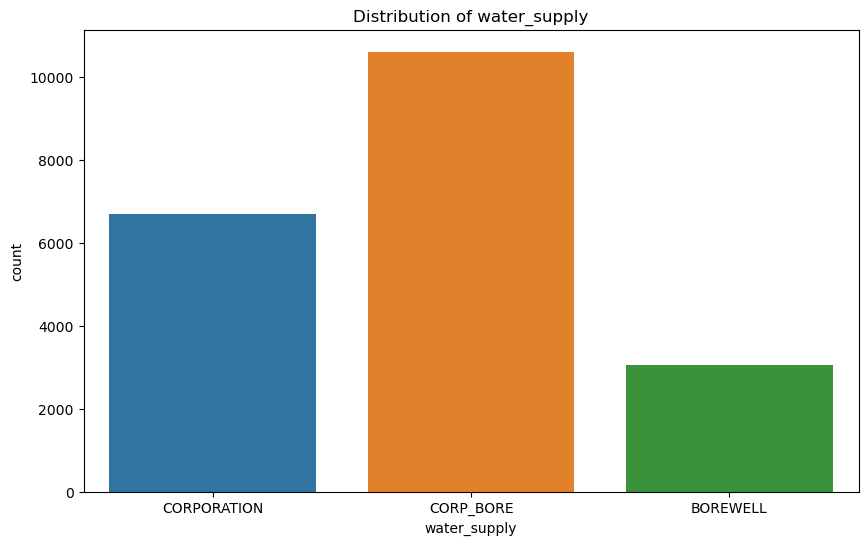

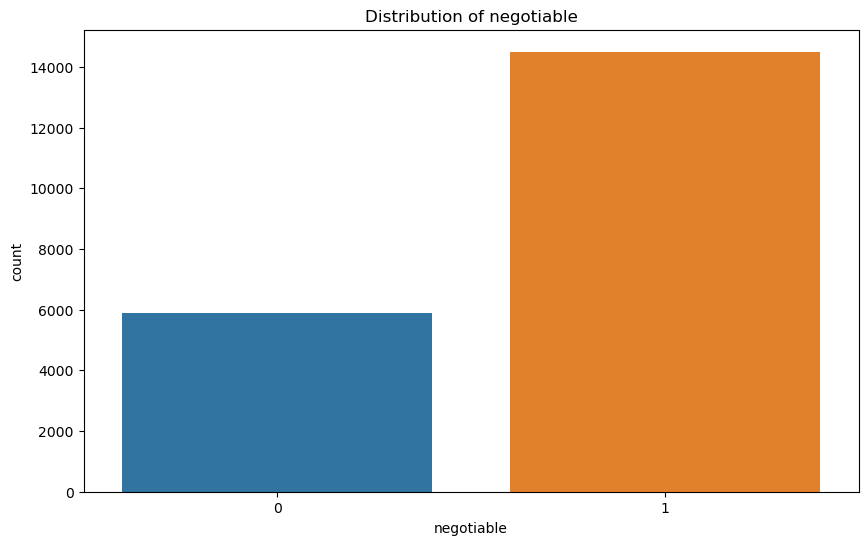

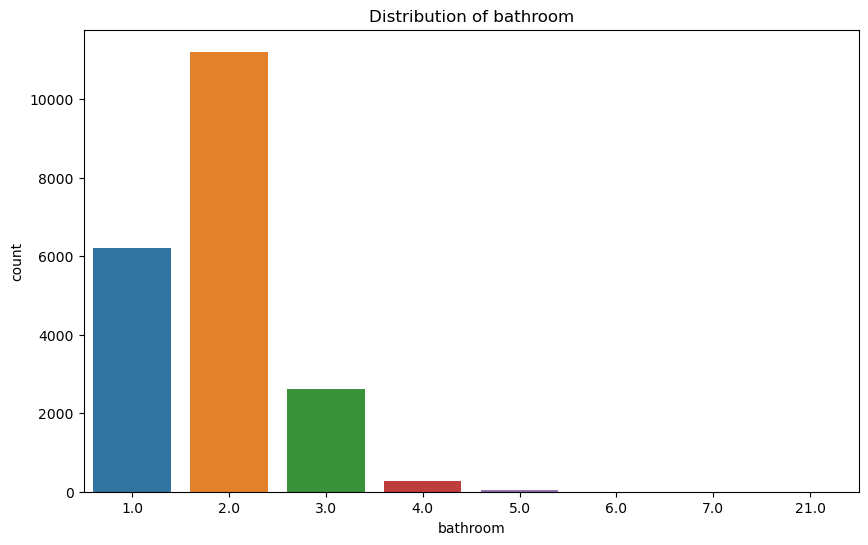

In [91]:
# Categorical variables distribution
categorical_features = ['type', 'lease_type', 'furnishing', 'facing', 'building_type', 'water_supply', 'negotiable', 'bathroom']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=df)
    plt.title(f'Distribution of {feature}')
    plt.show()

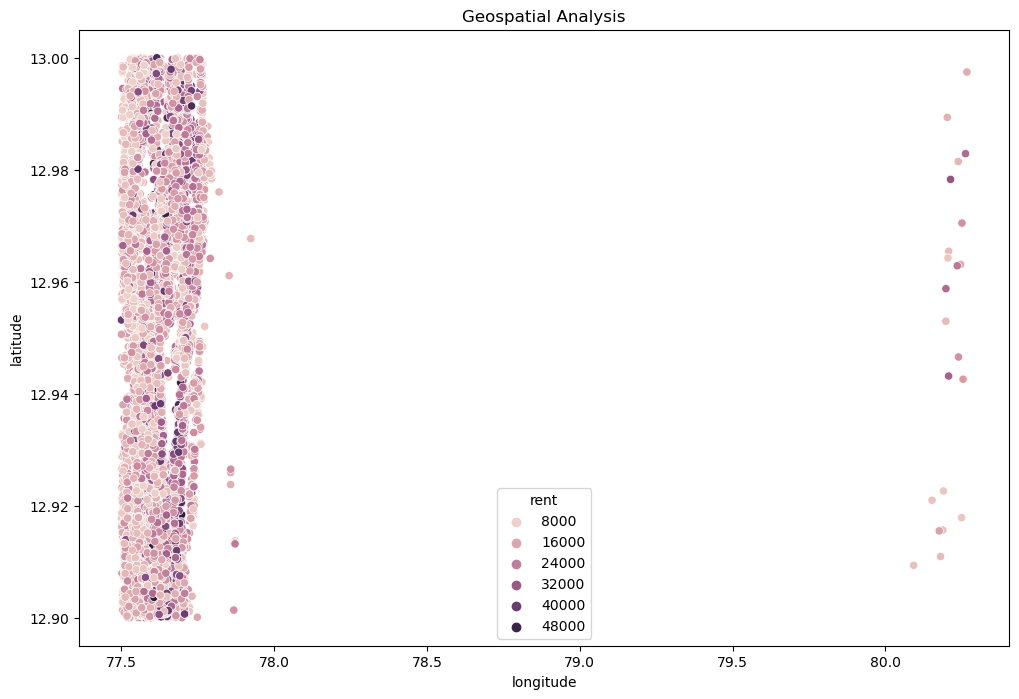

In [92]:
# Geospatial analysis
plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', hue='rent', data=df)
plt.title('Geospatial Analysis')
plt.show()

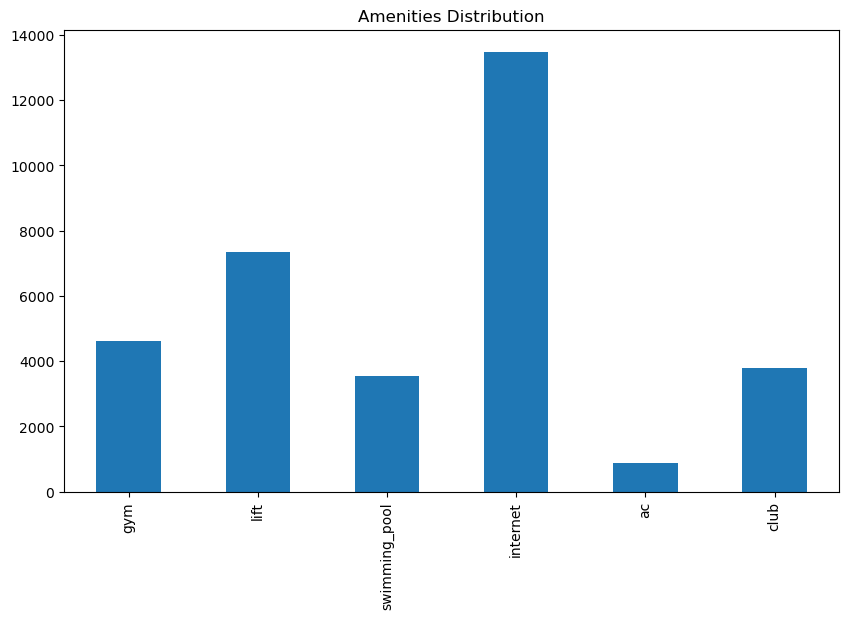

In [93]:
# Amenities analysis
amenities = ['gym', 'lift', 'swimming_pool', 'internet', 'ac', 'club']
df[amenities].sum().plot(kind='bar', figsize=(10, 6))
plt.title('Amenities Distribution')
plt.show()

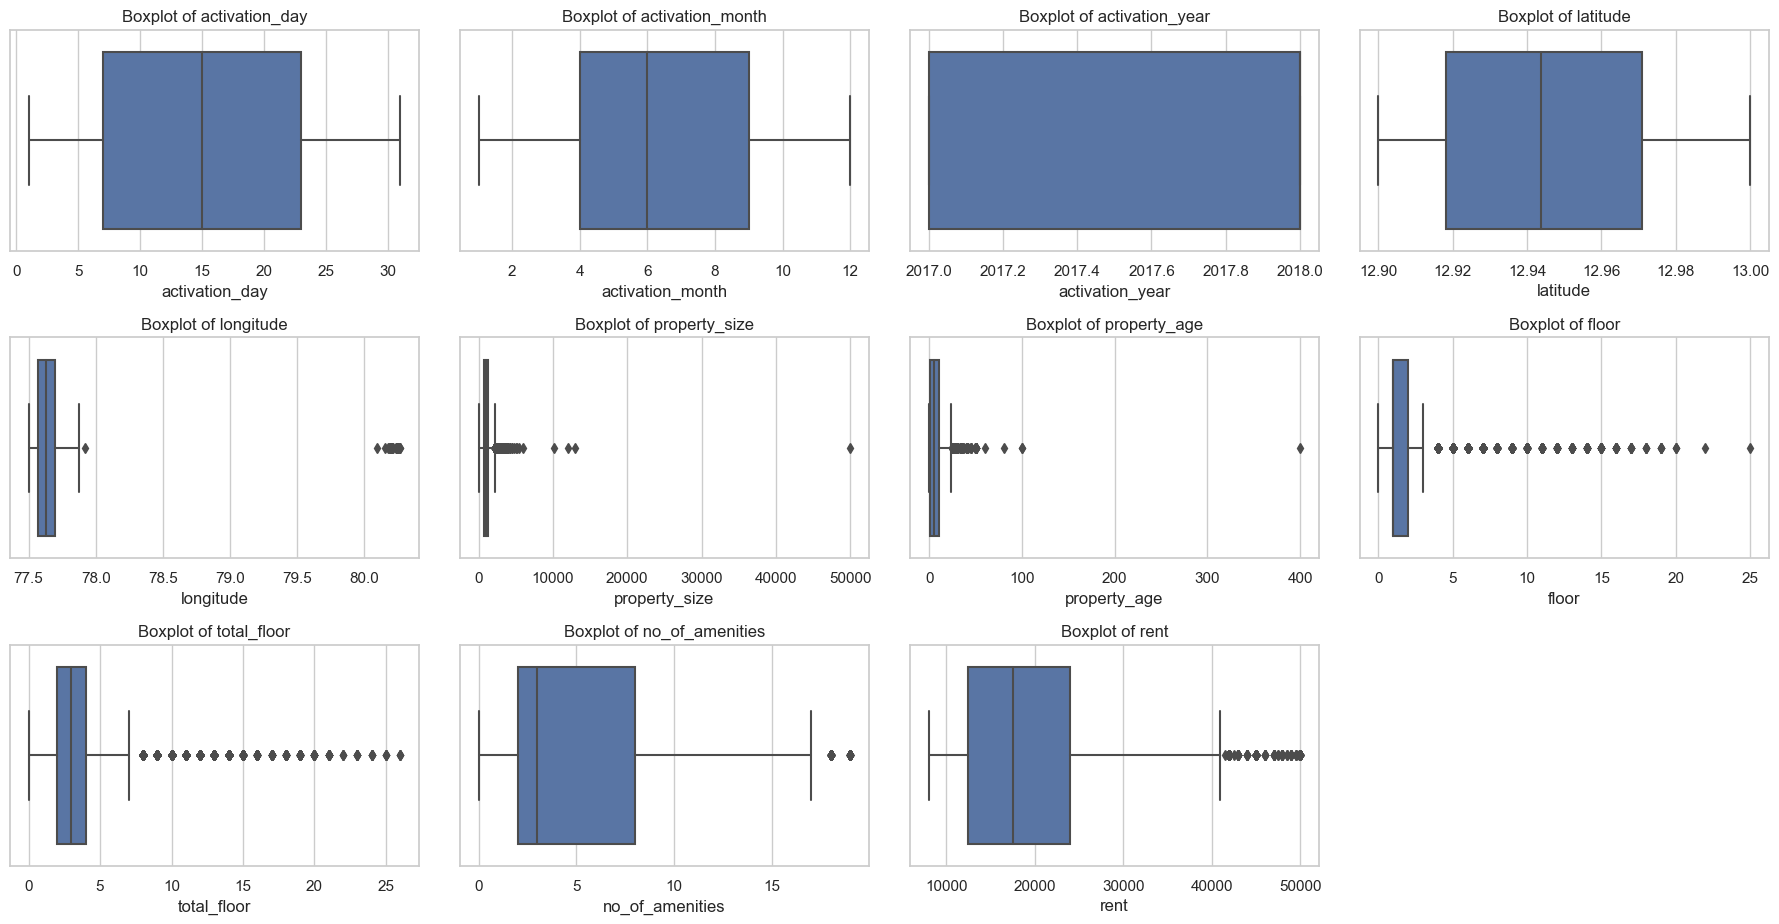

In [96]:
# Select columns for box plots
selected_columns = ['activation_day', 'activation_month', 'activation_year', 'latitude', 'longitude',
                    'property_size', 'property_age', 'floor', 'total_floor', 'no_of_amenities', 'rent']

# Create box plots
plt.figure(figsize=(18, 12))
sns.set(style="whitegrid")  # Set the style of the grid

# Loop through selected columns and create box plots
for i, column in enumerate(selected_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

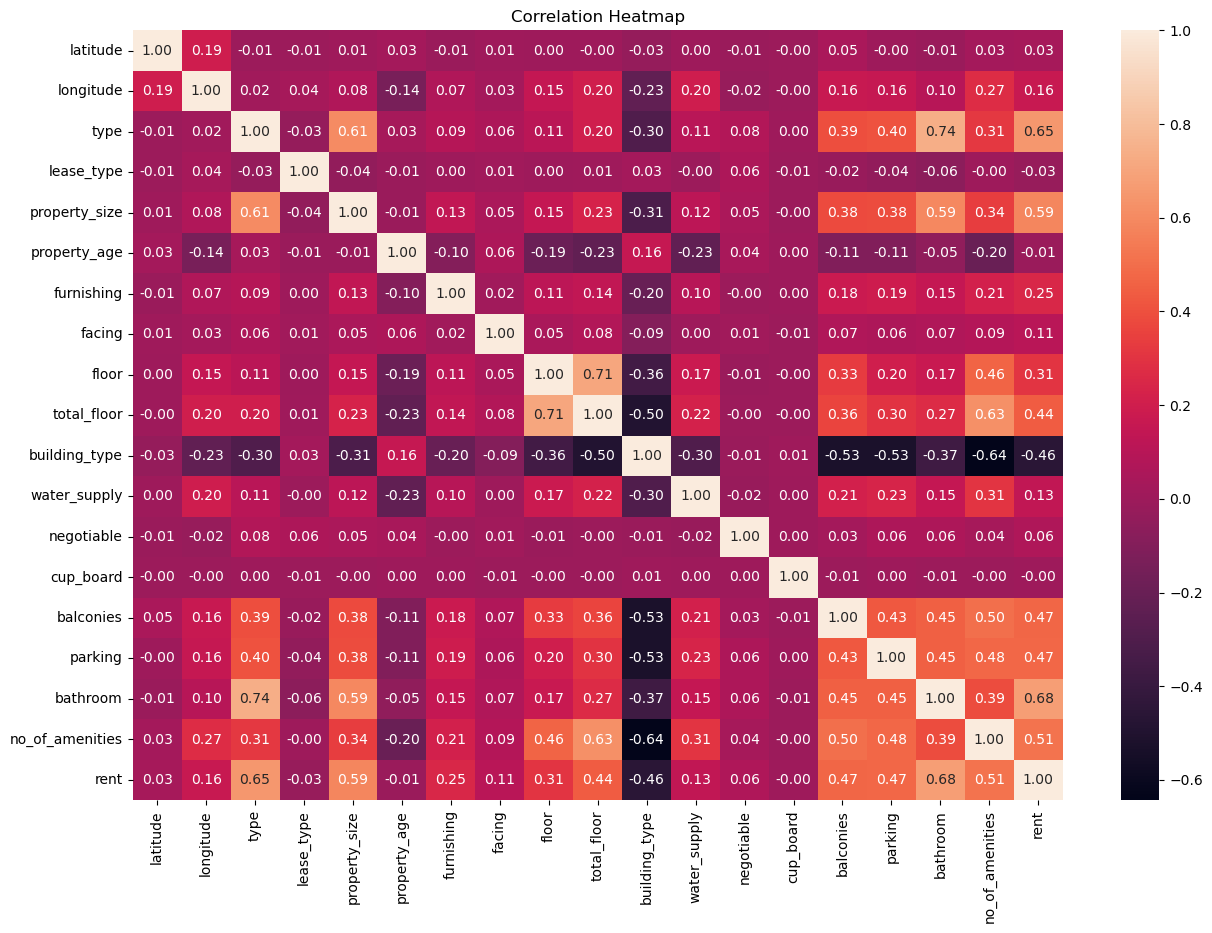

In [62]:
# Calculate the correlation matrix

df1_corr = df1[['latitude', 'longitude', 'type', 'lease_type', 'property_size', 'property_age', 'furnishing', 'facing', 'floor', 'total_floor', 'building_type', 'water_supply', 'negotiable', 'cup_board', 'balconies', 'parking', 'bathroom', 'no_of_amenities', 'rent']].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(df1_corr, annot=True, fmt=".2f") 
plt.title("Correlation Heatmap") 
plt.show()

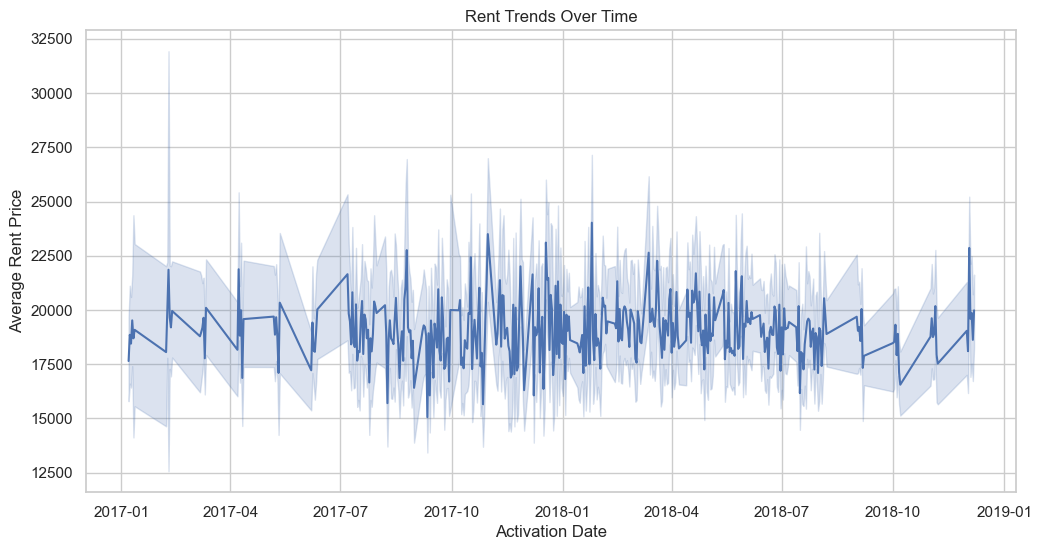

In [99]:
# Temporal Analysis
# 1. Rent Trends Over Time
df1['activation_date'] = pd.to_datetime(df1['activation_year'].astype(str) + '-' + df1['activation_month'].astype(str) + '-' + df1['activation_day'].astype(str))
plt.figure(figsize=(12, 6))
sns.lineplot(x='activation_date', y='rent', data=df1)
plt.title('Rent Trends Over Time')
plt.xlabel('Activation Date')
plt.ylabel('Average Rent Price')
plt.show()

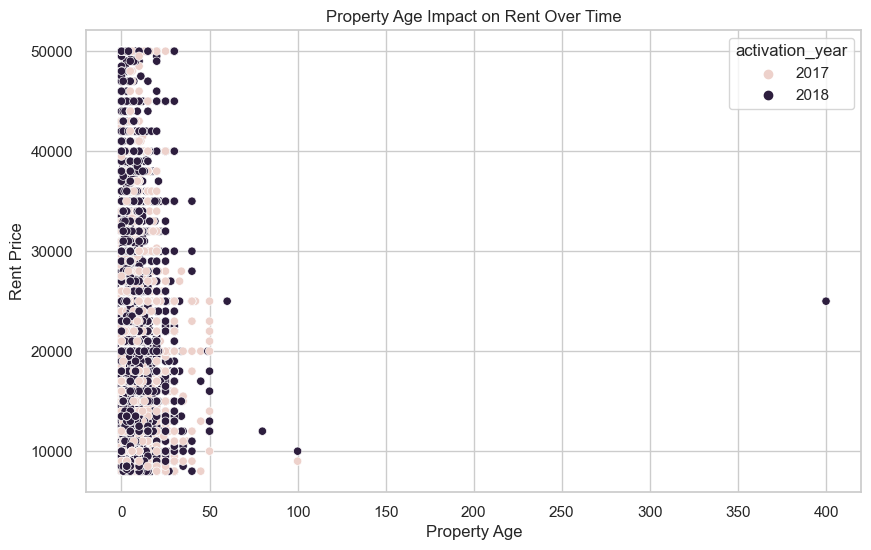

In [100]:
# 2. Property Age Impact on Rent Over Time
plt.figure(figsize=(10, 6))
sns.scatterplot(x='property_age', y='rent', hue='activation_year', data=df1)
plt.title('Property Age Impact on Rent Over Time')
plt.xlabel('Property Age')
plt.ylabel('Rent Price')
plt.show()

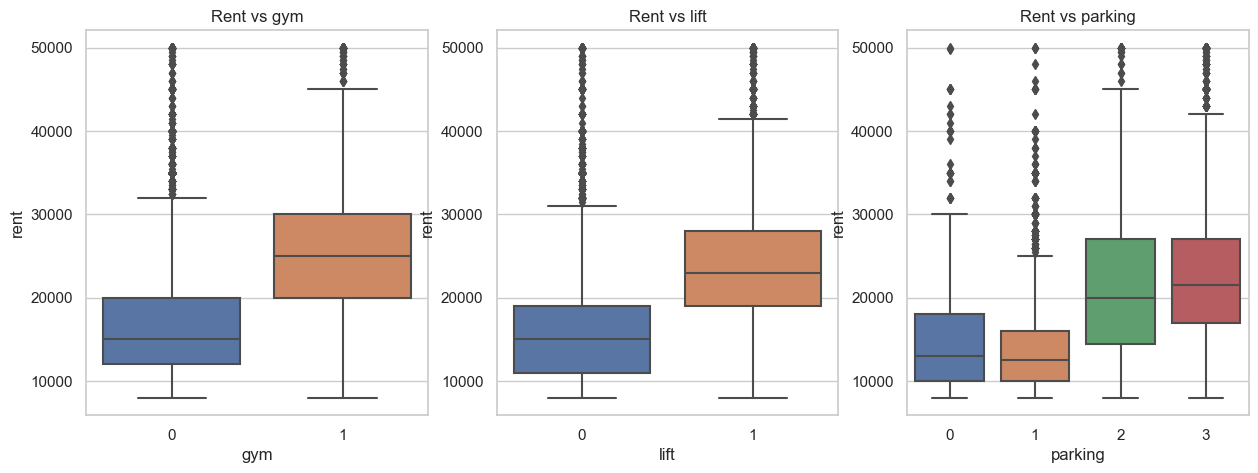

In [101]:
# Property Features and Rent
# 3. Impact of Features on Rent
features = ['gym', 'lift', 'parking']
fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(15, 5))
for i, feature in enumerate(features):
    sns.boxplot(x=feature, y='rent', data=df1, ax=axes[i])
    axes[i].set_title(f'Rent vs {feature}')
plt.show()

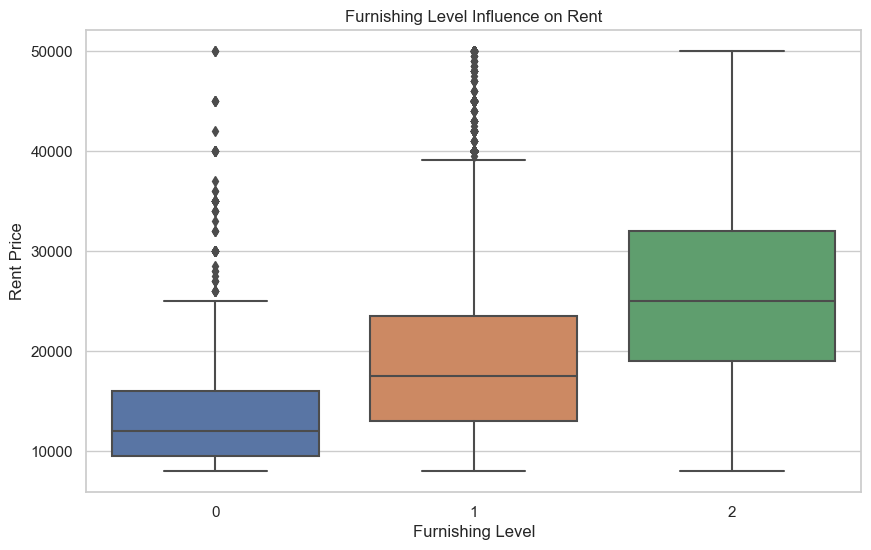

In [102]:
# 4. Furnishing Level Influence
plt.figure(figsize=(10, 6))
sns.boxplot(x='furnishing', y='rent', data=df1)
plt.title('Furnishing Level Influence on Rent')
plt.xlabel('Furnishing Level')
plt.ylabel('Rent Price')
plt.show()

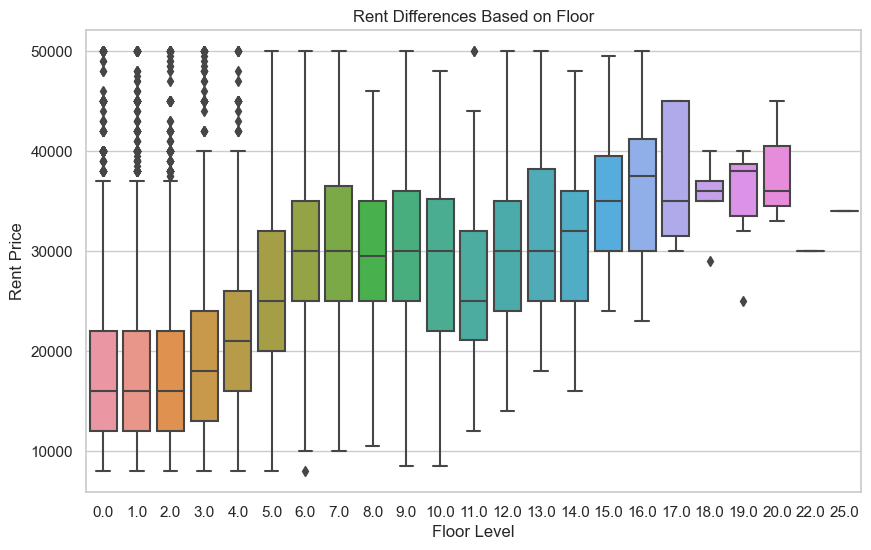

In [103]:
# Building Characteristics
# 5. Rent Differences Based on Floor
plt.figure(figsize=(10, 6))
sns.boxplot(x='floor', y='rent', data=df1)
plt.title('Rent Differences Based on Floor')
plt.xlabel('Floor Level')
plt.ylabel('Rent Price')
plt.show()

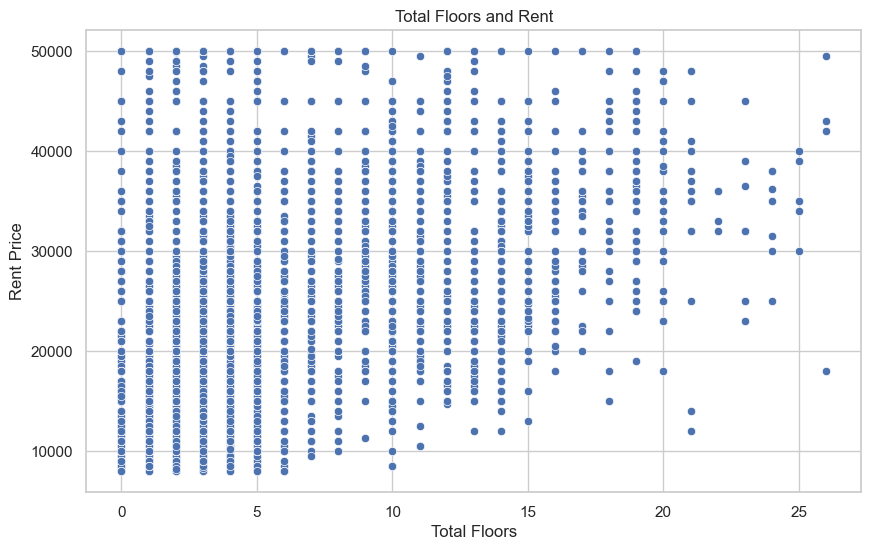

In [104]:
# 6. Total Floors and Rent
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_floor', y='rent', data=df1)
plt.title('Total Floors and Rent')
plt.xlabel('Total Floors')
plt.ylabel('Rent Price')
plt.show()

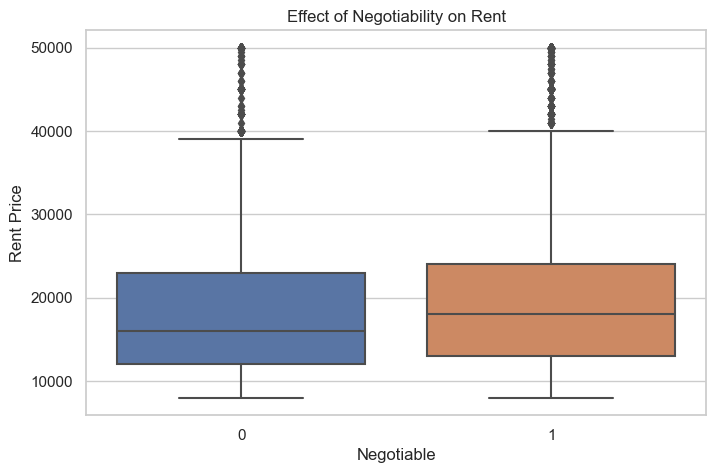

In [105]:
# Negotiability and Rent
# 7. Effect of Negotiability
plt.figure(figsize=(8, 5))
sns.boxplot(x='negotiable', y='rent', data=df1)
plt.title('Effect of Negotiability on Rent')
plt.xlabel('Negotiable')
plt.ylabel('Rent Price')
plt.show()

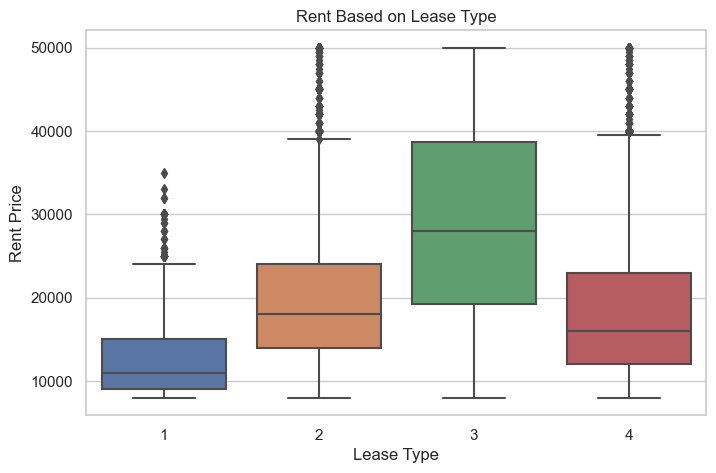

In [106]:
# 8. Rent Based on Lease Type
plt.figure(figsize=(8, 5))
sns.boxplot(x='lease_type', y='rent', data=df1)
plt.title('Rent Based on Lease Type')
plt.xlabel('Lease Type')
plt.ylabel('Rent Price')
plt.show()

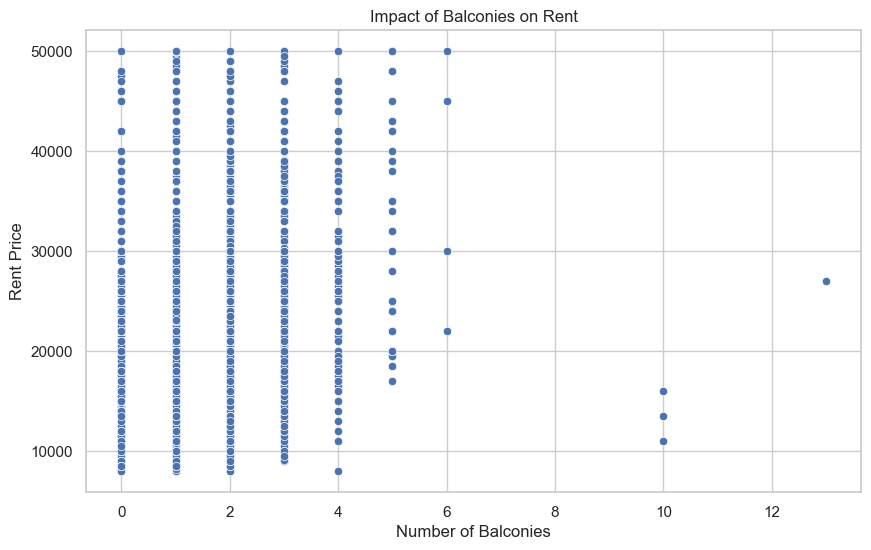

In [107]:
# Balconies and Rent
# 9. Impact of Balconies on Rent
plt.figure(figsize=(10, 6))
sns.scatterplot(x='balconies', y='rent', data=df1)
plt.title('Impact of Balconies on Rent')
plt.xlabel('Number of Balconies')
plt.ylabel('Rent Price')
plt.show()

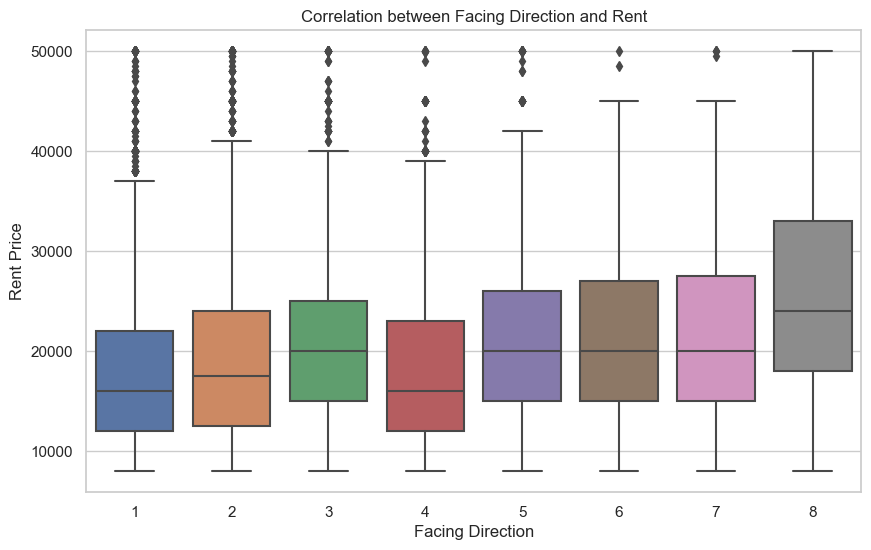

In [108]:
# 10. Correlation between Facing Direction and Rent
plt.figure(figsize=(10, 6))
sns.boxplot(x='facing', y='rent', data=df1)
plt.title('Correlation between Facing Direction and Rent')
plt.xlabel('Facing Direction')
plt.ylabel('Rent Price')
plt.show()

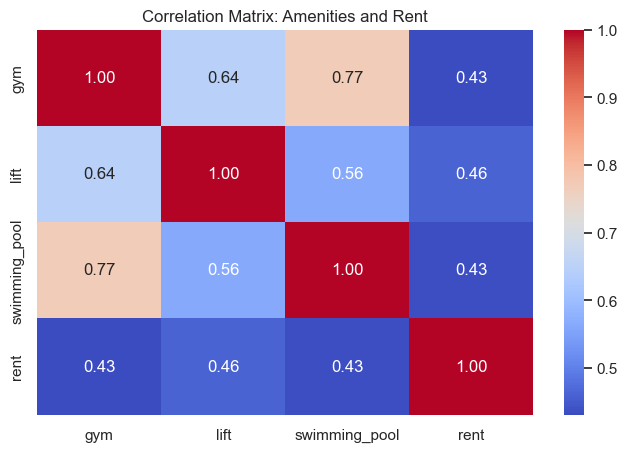

In [111]:
# Amenities and Rent
# 11. Correlation with Amenities
amenities = ['gym', 'lift', 'swimming_pool']
df_amenities = df1[amenities + ['rent']]
correlation_matrix = df_amenities.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Amenities and Rent')
plt.show()


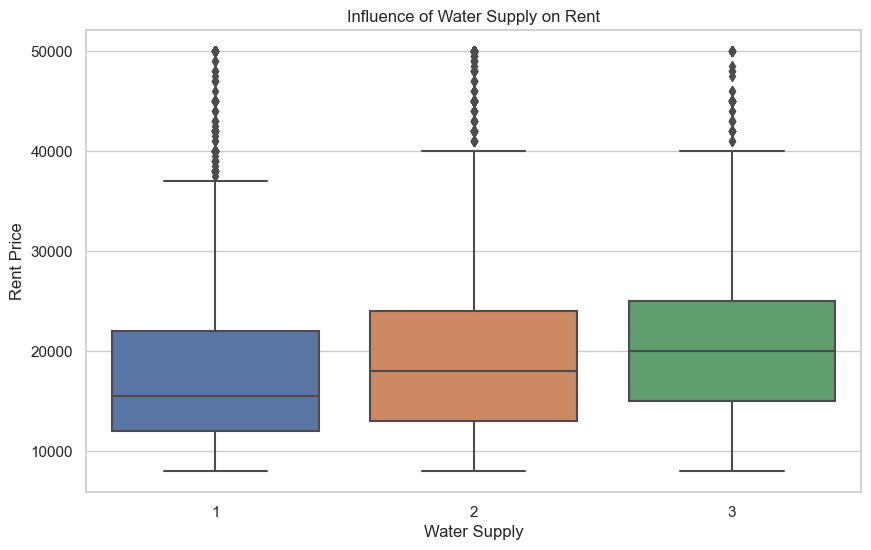

In [109]:
# Water Supply and Building Type
# 12. Influence of Water Supply
plt.figure(figsize=(10, 6))
sns.boxplot(x='water_supply', y='rent', data=df1)
plt.title('Influence of Water Supply on Rent')
plt.xlabel('Water Supply')
plt.ylabel('Rent Price')
plt.show()

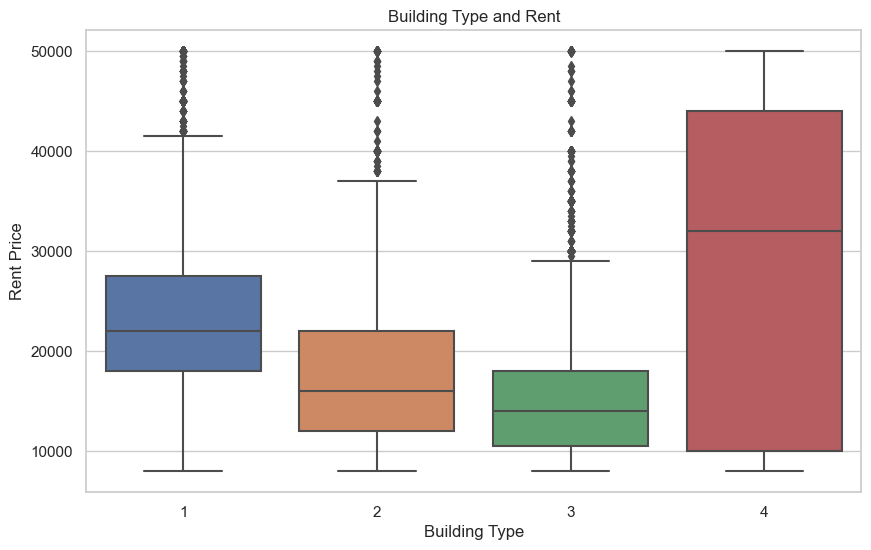

In [110]:
# 13. Building Type and Rent
plt.figure(figsize=(10, 6))
sns.boxplot(x='building_type', y='rent', data=df1)
plt.title('Building Type and Rent')
plt.xlabel('Building Type')
plt.ylabel('Rent Price')
plt.show()

/var/folders/5_/gr87l7990pq6c1zhr9t2t40r0000gn/T/ipykernel_37145/2983994123.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


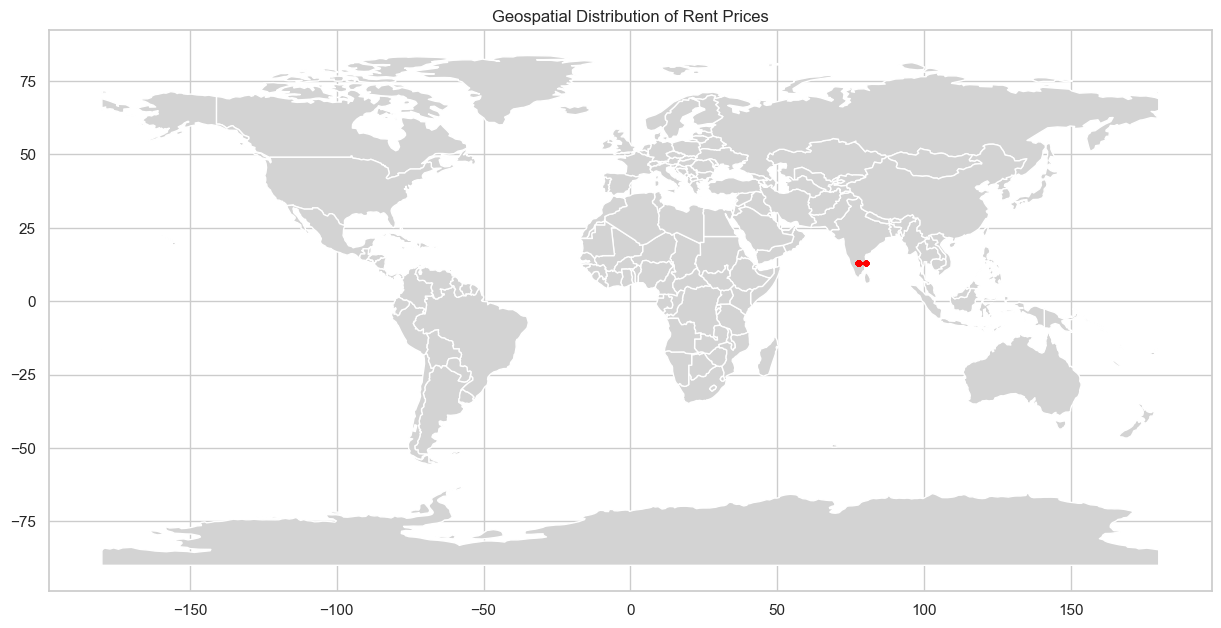

In [115]:
import geopandas as gpd
from shapely.geometry import Point

# Assuming your dataframe has 'latitude', 'longitude', 'locality', and 'rent' columns
gdf = gpd.GeoDataFrame(df1, geometry=gpd.points_from_xy(df1.longitude, df1.latitude))

# Plot map with rent prices
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(15, 10), color='lightgrey')

gdf.plot(ax=ax, marker='o', color='red', markersize=10, alpha=0.5)
plt.title('Geospatial Distribution of Rent Prices')
plt.show()

In [63]:
df1.to_csv('home_rent.csv', index=False)

# Feature Importance

In [72]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
import pickle

In [65]:
df1 = pd.read_csv("home_rent.csv")

In [67]:
df1.head()

,activation_day,activation_month,activation_year,locality,latitude,longitude,type,lease_type,property_size,property_age,...,sc,gp,park,rwh,stp,hk,pb,vp,no_of_amenities,rent
0,10,9,2017,Bellandur,12.929557,77.672280,2,4,1400,4.0,...,1,0.0,1,1.0,1.0,0,1,1.0,8.0,22000.0
1,6,12,2018,Thiruvanmiyur,12.982870,80.262012,3,2,1350,6.0,...,1,0.0,1,0.0,0.0,0,1,1.0,6.0,28000.0
2,20,7,2018,Attiguppe,12.955991,77.531634,1,2,600,3.0,...,0,0.0,0,0.0,0.0,0,0,0.0,0.0,8000.0
3,31,5,2018,Kodihalli,12.963903,77.649446,3,2,1500,15.0,...,0,0.0,1,0.0,0.0,0,0,1.0,3.0,45000.0
4,24,10,2017,"Seetharampalya,Hoodi",12.986196,77.718314,1,2,1080,0.0,...,0,0.0,0,0.0,0.0,0,1,0.0,8.0,18000.0


In [68]:
df.columns

Index(['type', 'locality', 'latitude', 'longitude', 'lease_type', 'gym',
       'lift', 'swimming_pool', 'negotiable', 'furnishing', 'parking',
       'property_size', 'property_age', 'bathroom', 'facing', 'cup_board',
       'floor', 'total_floor', 'water_supply', 'building_type', 'balconies',
       'rent', 'internet', 'ac', 'club', 'intercom', 'cpa', 'fs', 'servant',
       'security', 'sc', 'gp', 'park', 'rwh', 'stp', 'hk', 'pb', 'vp',
       'activation_day', 'activation_month', 'activation_year',
       'no_of_amenities'],
      dtype='object')

In [69]:
x = df1.drop(columns=['locality', 'rent'], axis=1) 
y = df1['rent']

In [97]:
x.columns

Index(['activation_day', 'activation_month', 'activation_year', 'latitude',
       'longitude', 'type', 'lease_type', 'property_size', 'property_age',
       'furnishing', 'facing', 'floor', 'total_floor', 'building_type',
       'water_supply', 'negotiable', 'cup_board', 'balconies', 'parking',
       'bathroom', 'gym', 'lift', 'swimming_pool', 'internet', 'ac', 'club',
       'intercom', 'cpa', 'fs', 'servant', 'security', 'sc', 'gp', 'park',
       'rwh', 'stp', 'hk', 'pb', 'vp', 'no_of_amenities'],
      dtype='object')

In [98]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20344 entries, 0 to 20343
Data columns (total 40 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   activation_day    20344 non-null  int64  
 1   activation_month  20344 non-null  int64  
 2   activation_year   20344 non-null  int64  
 3   latitude          20344 non-null  float64
 4   longitude         20344 non-null  float64
 5   type              20344 non-null  int64  
 6   lease_type        20344 non-null  int64  
 7   property_size     20344 non-null  int64  
 8   property_age      20344 non-null  float64
 9   furnishing        20344 non-null  int64  
 10  facing            20344 non-null  int64  
 11  floor             20344 non-null  float64
 12  total_floor       20344 non-null  float64
 13  building_type     20344 non-null  int64  
 14  water_supply      20344 non-null  int64  
 15  negotiable        20344 non-null  int64  
 16  cup_board         20344 non-null  float6

In [70]:
def model_regression(x,y,algorithm):
    for i in algorithm:
        xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=42)
        model = i().fit(xtrain,ytrain)
        # predict for train and test accuracy # Predicts the target variable for both the training and testing sets using the trained model
        y_train_pred = model.predict(xtrain)
        y_test_pred  = model.predict(xtest)

       # Accuracy score
        training = r2_score(ytrain,y_train_pred)
        testing = r2_score(ytest,y_test_pred)
        data = {'Algorithm':i.__name__, 'Training R2 Score':training,'Testing R2 Score':testing}
        print(data)

In [73]:
model_regression(x,y,[DecisionTreeRegressor,ExtraTreesRegressor,RandomForestRegressor])

{'Algorithm': 'DecisionTreeRegressor', 'Training R2 Score': 1.0, 'Testing R2 Score': 0.5968234113994488}
{'Algorithm': 'ExtraTreesRegressor', 'Training R2 Score': 1.0, 'Testing R2 Score': 0.7736010046090269}
{'Algorithm': 'RandomForestRegressor', 'Training R2 Score': 0.9728640548184784, 'Testing R2 Score': 0.8049039184026459}


In [74]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [75]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [76]:
# Create RandomForestRegressor
rf_model = RandomForestRegressor()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [77]:
# Get the best hyperparameters
best_params = grid_search.best_params_

# Use the best hyperparameters to train the model
best_model = grid_search.best_estimator_

# Evaluate on the test set
test_r2_score = best_model.score(x_test, y_test)

print("Best Hyperparameters:", best_params)
print("Test R2 Score:", test_r2_score)

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Test R2 Score: 0.8057214265851709


In [78]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42) 
model = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=10).fit(x_train, y_train) 
y_pred_train = model.predict(x_train) 
y_pred_test = model.predict(x_test) 
r2_train = r2_score(y_train, y_pred_train) 
r2_test = r2_score(y_test, y_pred_test) 
r2_train, r2_test

(0.9391488351970082, 0.8053898060856765)

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42) 
model = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=5).fit(x_train, y_train) 
y_pred = model.predict(x_test) 
mse = mean_squared_error(y_test, y_pred) 
rmse = np.sqrt(mse) 
r2 = r2_score(y_test, y_pred) 
mae = mean_absolute_error(y_test, y_pred) 
metrics = {'R2': r2, 'Mean Absolute Error': mae, 'Mean Squared Error': mse, 'Root Mean Squared Error': rmse} 
metrics

{'R2': 0.805017760003542,
 'Mean Absolute Error': 2646.006452654966,
 'Mean Squared Error': 14026792.90565678,
 'Root Mean Squared Error': 3745.23602803038}

In [81]:
user_data = np.array([[10,9,2017,12.93,77.67,2,4,1400,4,1,5,3,4,1,1,1,2,2,3,2,0,1,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,1,1,8]]) 
y_pred = model.predict(user_data) 
y_pred[0]

/Users/arul/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


24167.218600807406

In [82]:
x.values

array([[1.000e+01, 9.000e+00, 2.017e+03, ..., 1.000e+00, 1.000e+00,
        8.000e+00],
       [6.000e+00, 1.200e+01, 2.018e+03, ..., 1.000e+00, 1.000e+00,
        6.000e+00],
       [2.000e+01, 7.000e+00, 2.018e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [2.100e+01, 1.200e+01, 2.017e+03, ..., 1.000e+00, 0.000e+00,
        8.000e+00],
       [2.800e+01, 6.000e+00, 2.018e+03, ..., 1.000e+00, 1.000e+00,
        1.000e+01],
       [7.000e+00, 8.000e+00, 2.018e+03, ..., 0.000e+00, 0.000e+00,
        2.000e+00]])

In [83]:
model

RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=2,
                      min_samples_split=5)

# Save Model

In [84]:
with open('home_rent_regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [85]:
with open('home_rent_regression_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [86]:
model

RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=2,
                      min_samples_split=5)

In [87]:
user_data = np.array([[10,9,2017,12.93,77.67,2,4,1400,4,1,5,3,4,1,1,1,2,2,3,2,0,1,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,1,1,8]]) 
y_pred = model.predict(user_data) 
y_pred[0]

/Users/arul/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


24167.218600807406